In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Dataset: beer_foam.csv

Source: J.J. Hackbarth (2006). "Multivariate Analyses of Beer Foam Stand,"
Journal of the Institute of Brewing, Vol. 112, #1, pp. 17-24

Description: Measurements of wet foam height and beer height at various
time points for Shiner Bock at 20C. Author fits exponential decay model:
H(t) = H(0)*exp(-lambda*t)

Variables/Columns
TIME: Time from pour (seconds)  4-8
FOAM: Wet foam height (cm)  10-16
BEER: Beer height (cm)    18-24

**Hypothesis**: Can we predict the time from pour using the measurements of foam height and beer height?


In [2]:
# Read the csv file into a pandas DataFrame

foam = pd.read_csv('earthquakes-clean.csv')
foam.head()

,id,tsunami,year,eq,region,deaths
0,7614.0,0.0,2007.0,1.6,150.0,3.0
1,10330.0,0.0,2018.0,2.1,10.0,7.0
2,10036.0,0.0,2013.0,2.1,150.0,14.0
3,5754.0,0.0,2004.0,2.2,110.0,0.0
4,9832.0,0.0,2011.0,3.1,150.0,0.0


In [5]:
# Assign the data to X and y

X = foam[["region", "deaths"]]
y = foam["eq"].values.reshape(-1, 1)
print(X.shape, y.shape)

(6018, 2) (6018, 1)


In [6]:
# Use train_test_split to create training and testing data

### BEGIN SOLUTION
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

### END SOLUTION

In [7]:
# Create the model using LinearRegression

### BEGIN SOLUTION
from sklearn.linear_model import LinearRegression
model = LinearRegression()
### END SOLUTION

In [8]:
# Fit the model to the training data and calculate the scores for the training and testing data

### BEGIN SOLUTION
model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

### END SOLUTION 

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.016788296539609893
Testing Score: 0.0045035934406078


Text(0.5,1,'Residual Plot')

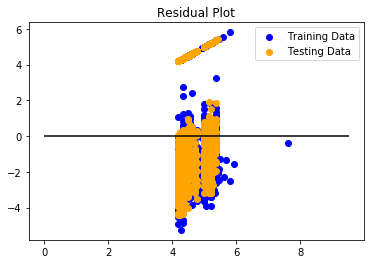

In [9]:
# Plot the Residuals for the Training and Testing data

### BEGIN SOLUTION
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")
### END SOLUTION